## Entropy in Machine Learning

### Overview

Entropy, a key concept borrowed from information theory, measures the level of uncertainty or disorder within a dataset. It plays a crucial role in machine learning, especially in the construction and optimization of decision tree models. Entropy quantifies how mixed or impure the classes within a dataset are, providing a mathematical foundation for making decisions that aim to increase the predictability of data classifications.

### Mathematical Definition

The entropy $H(X)$ of a dataset $X$, with possible outcomes $x_1, x_2, ..., x_n$, each having probability $p(x_i)$, is defined as:

$$ H(X) = -\sum_{i=1}^{n} p(x_i) \log_2 p(x_i) $$

This formula calculates the expected value of the information content, or surprisal, for the outcomes, indicating the average "surprise" conveyed by an outcome's occurrence.

### Interpretation as Expected Value

Entropy can be understood as the expected value of the information content associated with each outcome. Information content for an outcome $x_i$ is quantified as $-\log_2 p(x_i)$, reflecting how surprising or informative that outcome is. High entropy indicates that outcomes are unpredictable and carry more information, while low entropy suggests predictability and less information content.

#### Connection to Uncertainty

- **High Entropy**: Indicates a diverse dataset with evenly distributed classes, making it challenging to predict the class of a new sample due to high uncertainty. This condition signifies a high degree of information variety or class diversity within the dataset.

- **Low Entropy**: Implies a more homogeneous dataset where certain outcomes are much more likely than others. Low entropy is associated with reduced uncertainty, as the dataset tends toward predictability with one or few dominant classes.

### Practical Application in Decision Trees

In decision tree algorithms, entropy is used to determine the best attribute for splitting the data at each node. The goal is to choose splits that result in the largest decrease in entropy, thereby increasing the homogeneity (or purity) of the resulting subsets. This method, known as maximizing information gain, reduces uncertainty in the classification of samples and enhances the overall predictability and effectiveness of the decision tree model.

### Conclusion

Understanding entropy as the expected value of information content, and its impact on uncertainty, is fundamental in machine learning. It not only guides the construction of more accurate decision tree models but also deepens our comprehension of data complexity and classification challenges. Entropy serves as a bridge between theoretical information theory and practical machine learning, emphasizing the goal of reducing uncertainty and enhancing predictability in data-driven decision-making.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def calc_entropy(*probabilities):
    entropies = [sum(p * -np.log2(p) for p in probs if p > 0) for probs in zip(*probabilities)]
    return entropies

def plot_entropy_2_probabilities():
    p1 = np.linspace(0, 1, 100)
    p2 = 1 - p1
    
    entropy = calc_entropy(p1, p2)

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(p1, p2, entropy)
    ax.set_xlabel('Probability of Class 1 (p1)')
    ax.set_ylabel('Probability of Class 2 (p2)')
    ax.set_zlabel('Entroy')
    ax.set_title('Entropy as a function of p1 and p2')

    plt.show()


def plot_entropy_3_probabilities():
    # Generate a grid of probability values
    p1_values = np.linspace(0, 1, 50)
    p2_values = np.linspace(0, 1, 50)

    p1_list = []
    p2_list = []
    p3_list = []

    for p1 in p1_values:
        for p2 in p2_values:
            p3 = 1 - p1 - p2
            if p3 >= 0:    
                p1_list.append(p1)
                p2_list.append(p2)
                p3_list.append(p3)
    
    
    entropy = calc_entropy(np.array(p1_list), np.array(p2_list), np.array(p3_list))
    
    # Convert the list to a NumPy array
    entropy = np.array(entropy)

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(p1_list, p2_list, p3_list, c=entropy, cmap='viridis')
    ax.set_xlabel('Probability of Class 1 (p1)')
    ax.set_ylabel('Probability of Class 2 (p2)')
    ax.set_zlabel('Probability of Class 3 (p3)')
    ax.set_title('Entropy as a function of p1, p2, and p3')
    fig.colorbar(sc, label='Entropy')
    plt.show()

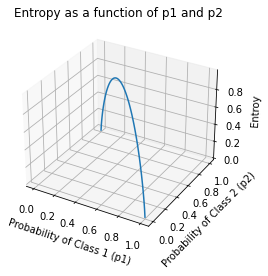

In [5]:
plot_entropy_2_probabilities()

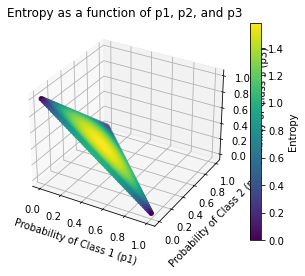

In [6]:
plot_entropy_3_probabilities() 

## Information Gain 

### Overview

Information gain is a metric used in machine learning to quantify the improvement in predictability or reduction in uncertainty about a target variable resulting from partitioning the data according to a particular feature. It plays a fundamental role in the construction of decision trees, serving as a criterion for selecting the feature that best splits the dataset at each node.
 
### Conceptual Foundation

Information gain is based on the concept of entropy, which, as we've discussed, measures the amount of uncertainty or disorder within a dataset. In the context of building decision trees, information gain measures the change in entropy before and after splitting the data on a specific feature. The goal is to choose the split that results in the highest information gain, thereby most effectively reducing uncertainty in the dataset.

### Mathematical Definition

The information gain \(IG\) for a dataset \(D\) split on a feature \(A\) is defined as the difference between the original entropy of \(D\) and the weighted average entropy of the subsets created by the split:

\[ IG(D, A) = H(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|} H(D_v) \]

where:
- \(H(D)\) is the original entropy of the dataset \(D\),
- \(Values(A)\) represents the distinct values that feature \(A\) can take,
- \(|D_v|\) is the number of elements in \(D\) for which feature \(A\) has value \(v\),
- \(H(D_v)\) is the entropy of the subset of \(D\) where feature \(A\) has value \(v\).

### Practical Application

In decision tree algorithms, such as ID3, C4.5, and CART, information gain is used to decide which feature to split on at each step of the tree-building process. By selecting the feature that provides the highest information gain, the algorithm incrementally constructs a tree that aims to minimize entropy (maximize predictability) in its leaves. This process results in a model that can effectively classify new samples based on the values of their features.

### Importance

The use of information gain in decision trees highlights the importance of choosing features that are most indicative of the target variable. Features that provide high information gain yield partitions with lower entropy, meaning the classes within those partitions are more distinct and easier to predict. This approach ensures that the decision tree is both accurate and interpretable, focusing on the most relevant features for classification.

### Conclusion

Information gain is a powerful tool in the toolkit of machine learning practitioners, especially for those working with decision trees. It leverages the mathematical principles of entropy to guide the construction of models that are both efficient and effective, thereby reducing uncertainty and enhancing the decision-making process in predictive modeling tasks.
